Impute Episode Length
=====================

Initial exploration indicates that episode length is the feature that has the most impact on the 
target feature (epidode completion). However a number of values in the "Episode_Length_minutes" 
column are missing. This notebook investigates different methods to fill in the missing values,
looking at both the training data AND the original dataset.

In [1]:
# import libraries and set constants

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.impute as imp

from sklearn.experimental import enable_iterative_imputer

COLNAME = "Episode_Length_minutes"
NEW_COL = "Length_Clean"

In [2]:
# load data for train and original datasets

DATA_DIR = "../data/kaggle/"
ORIG_DIR = "../data/original/"

df_train = pd.read_csv( DATA_DIR + "train.clean.20250409.150218.csv" )
df_test  = pd.read_csv( DATA_DIR + "test.csv" )
df_orig  = pd.read_csv( ORIG_DIR + "podcast_dataset.csv")

# Episode Length Analysis

## Training Data

In [3]:
total_size = len(df_train)
valid_size = df_train[ COLNAME ].count()

print(f"Found {valid_size} of \"{COLNAME}\" values out of {total_size} total")
print(f"Percentage of valid values is {round(valid_size / total_size, 3)*100}%")

Found 662907 of "Episode_Length_minutes" values out of 750000 total
Percentage of valid values is 88.4%


In [4]:
df_train[[ COLNAME ]].describe()

,Episode_Length_minutes
count,662907.000000
mean,64.504738
std,32.969603
min,0.000000
25%,35.730000
50%,63.840000
75%,94.070000
max,325.240000


In [5]:
df_train[ df_train[ COLNAME ] >= 120.5 ]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,IsGuest,Num_Ads,Name_And_Episode,Num_Ads_Bin,Genre_Encoded,Ads_Bin_Encoded,Name_And_Episode_Encoded
74270,74270,Tech Trends,Episode 31,120.64,Technology,49.78,Saturday,Morning,50.54,1.0,Neutral,119.73000,1,1.0,Tech Trends Episode 31,1,45.634746,47.273388,53.115907
101637,101637,Home & Living,Episode 16,325.24,Lifestyle,50.69,Tuesday,Afternoon,15.01,0.0,Positive,64.31981,1,0.0,Home & Living Episode 16,0,45.523116,49.072972,44.178836
168115,168115,Wellness Wave,Episode 78,120.64,Health,49.78,Thursday,Morning,50.54,1.0,Neutral,119.73000,1,1.0,Wellness Wave Episode 78,1,45.741408,47.273388,47.180255
552181,552181,Athlete's Arena,Episode 15,120.73,Sports,78.42,Friday,Evening,54.24,1.0,Neutral,119.67000,1,1.0,Athlete's Arena Episode 15,1,44.935727,47.273388,49.525265
598106,598106,Crime Chronicles,Episode 53,120.93,True Crime,48.73,Friday,Morning,72.96,2.0,Positive,70.90288,1,2.0,Crime Chronicles Episode 53,2,46.042499,43.214229,48.299474


In [6]:
df_train[ "Length_Clean" ] = df_train[ COLNAME ].apply( lambda v: 120.5 if v > 120.5 else v )

## Original Data

In [7]:
total_size = len(df_orig)
valid_size = df_orig[ COLNAME ].count()

print(f"Found {valid_size}  of \"{COLNAME}\" values out of {total_size} total")
print(f"Percentage of valid values is {round(valid_size / total_size, 3)*100}%")

Found 47254  of "Episode_Length_minutes" values out of 52500 total
Percentage of valid values is 90.0%


In [8]:
df_orig[[ COLNAME ]].describe()

,Episode_Length_minutes
count,47254.000000
mean,62.853491
std,33.137428
min,5.000000
25%,34.300000
50%,62.870000
75%,91.550000
max,120.000000


## Test Data

In [9]:
total_size = len(df_test)
valid_size = df_test[ COLNAME ].count()

print(f"Found {valid_size}  of \"{COLNAME}\" values out of {total_size} total")
print(f"Percentage of valid values is {round(valid_size / total_size, 3)*100}%")

Found 221264  of "Episode_Length_minutes" values out of 250000 total
Percentage of valid values is 88.5%


# Histograms

In [10]:
NUM_BINS = 100

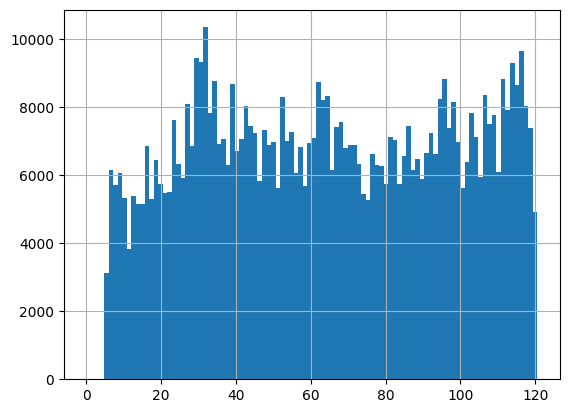

In [11]:
df_train[ NEW_COL ].hist(bins=NUM_BINS)
plt.show()

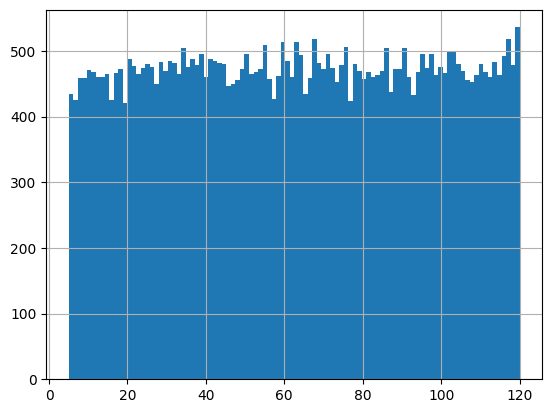

In [12]:
df_orig[ COLNAME ].hist(bins=NUM_BINS)
plt.show()

# Episode Completion Percentage

Given that there's such wide and consistent variability across episode lengths, it seems likely that there is some 

In [13]:
total_size = len(df_orig)
valid_size = df_orig[ "Listening_Time_minutes" ].count()

print(f"Found {valid_size}  of \"{COLNAME}\" values out of {total_size} total")
print(f"Percentage of valid values is {round(valid_size / total_size, 3)*100}%")

Found 47105  of "Episode_Length_minutes" values out of 52500 total
Percentage of valid values is 89.7%


In [14]:
df_orig_clean = df_orig.dropna(subset=["Listening_Time_minutes", "Episode_Length_minutes"]).copy()

#total_size = len(df_orig_clean)
valid_size = df_orig_clean[ "Listening_Time_minutes" ].count()

print(f"Found {valid_size}  of \"{COLNAME}\" values out of {total_size} total")
print(f"Percentage of valid values is {round(valid_size / total_size, 4) * 100 }%")

Found 42410  of "Episode_Length_minutes" values out of 52500 total
Percentage of valid values is 80.78%


## Original Dataset

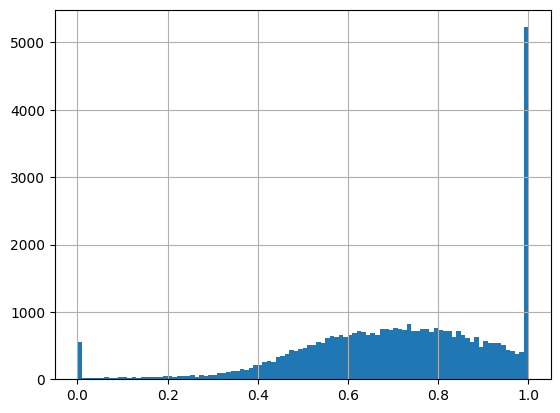

In [15]:
df_orig_clean["Episode_Completion"] = df_orig_clean["Listening_Time_minutes"] / df_orig_clean["Episode_Length_minutes"]
df_orig_clean["Episode_Completion"].hist(bins=NUM_BINS)
plt.show()

## Training Dataset

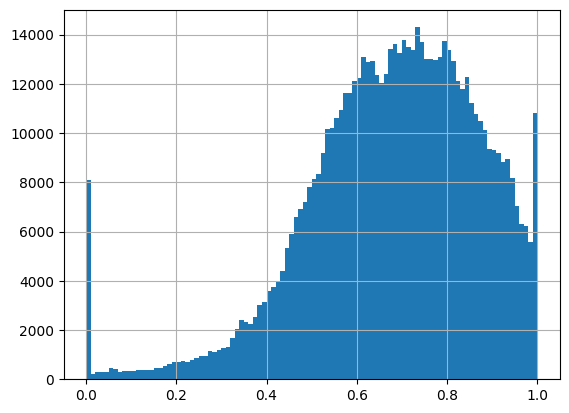

In [16]:
df_train["Episode_Completion"] = df_train["Listening_Time_minutes"] / df_train["Length_Clean"]
df_train['Episode_Completion'] = df_train['Episode_Completion'].apply( lambda v: 1 if v > 1 else v )

df_train["Episode_Completion"].hist(bins=NUM_BINS)
plt.show()

# Feature Correlation

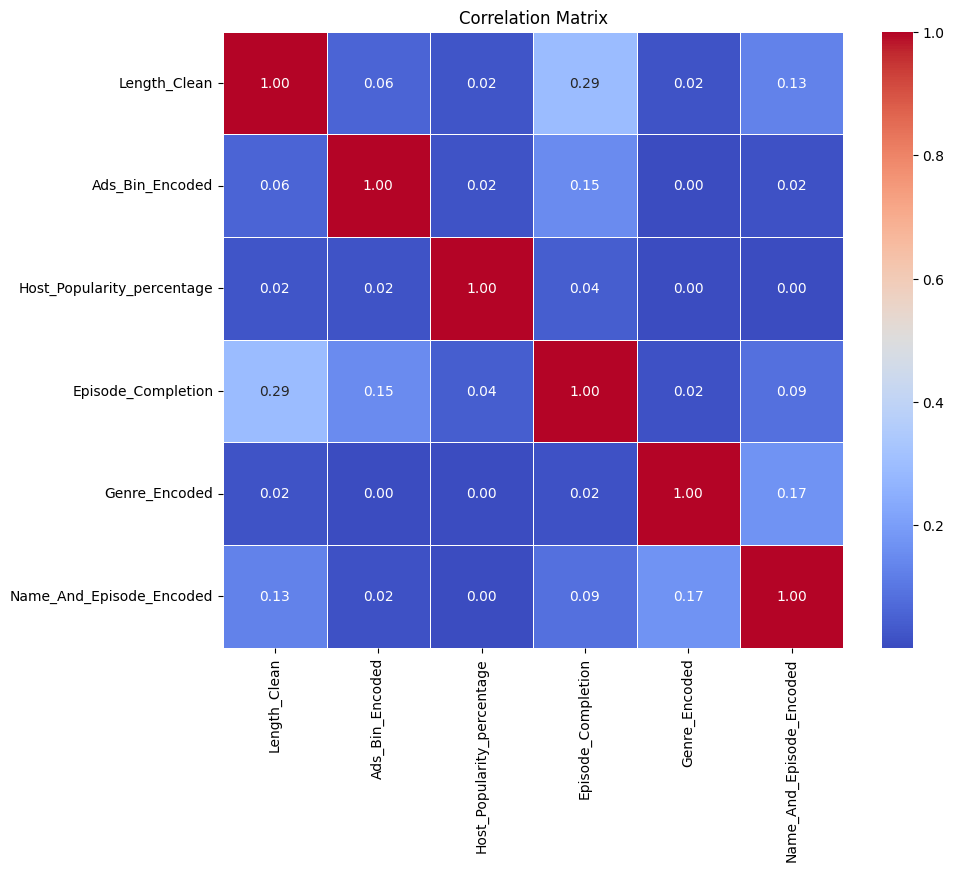

In [17]:
corr_columns = [ "Length_Clean", "Ads_Bin_Encoded", "Host_Popularity_percentage", "Episode_Completion",
                 "Genre_Encoded", "Name_And_Episode_Encoded" ]
#df_train.drop(columns=['id'], inplace=True)
corr_matrix = df_train[ corr_columns ].corr(numeric_only=True)

plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Simple Imputer

In [18]:
median_impute = imp.SimpleImputer(missing_values=np.nan, strategy='median')

median_impute.fit(df_train[['Length_Clean']])
df_train['Episode_Length_Imputed'] = median_impute.transform(df_train[['Length_Clean']])

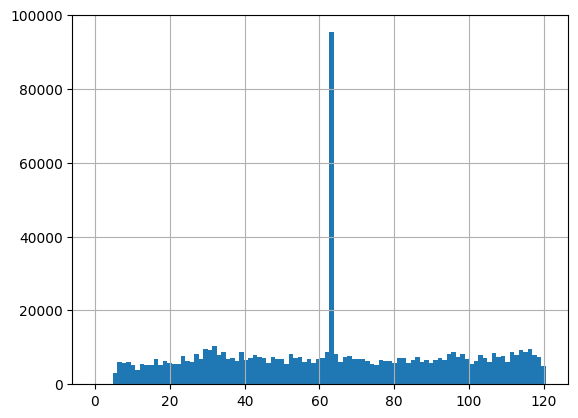

In [19]:
df_train['Episode_Length_Imputed'].hist(bins=NUM_BINS)
plt.show()

In [20]:
median_impute.fit(df_train[['Episode_Completion']])
df_train["Completion_Simple_Impute"] = median_impute.transform(df_train[['Episode_Completion']])

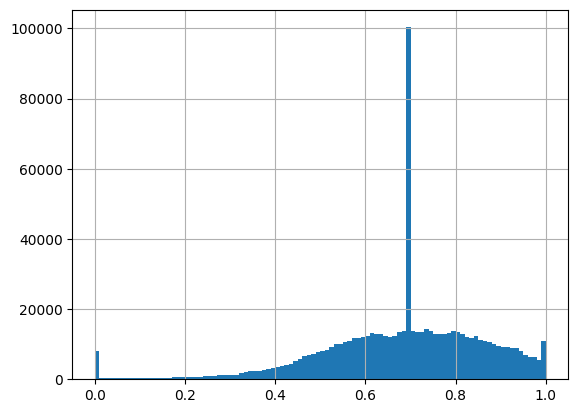

In [21]:
df_train["Completion_Simple_Impute"].hist(bins=NUM_BINS)
plt.show()

# Iterative Imputer

In [22]:
iter_impute = imp.IterativeImputer(missing_values=np.nan, max_iter=50)

impute_cols = ["Episode_Completion", "Host_Popularity_percentage", "Num_Ads_Bin", 
               "Ads_Bin_Encoded", "Genre_Encoded", "Name_And_Episode_Encoded"]
iter_impute.fit(df_train[impute_cols])

df_train["Completion_Iter_Impute" ] = iter_impute.transform(df_train[impute_cols])[:,0]

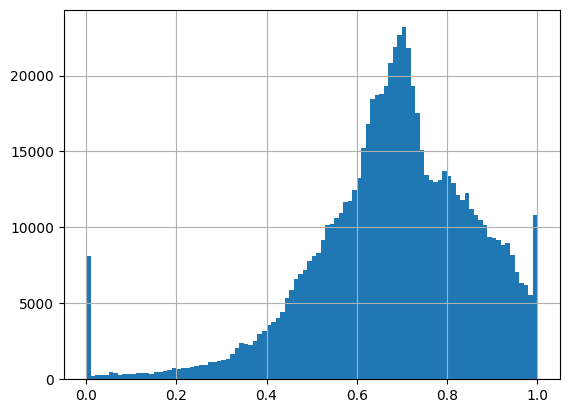

In [23]:
df_train["Completion_Iter_Impute"].hist(bins=NUM_BINS)
plt.show()

In [24]:
iter_impute = imp.IterativeImputer(missing_values=np.nan, max_iter=50)

impute_cols = ["Length_Clean", "Host_Popularity_percentage", 
               "Num_Ads_Bin", "Ads_Bin_Encoded", "Genre_Encoded", "Name_And_Episode_Encoded"]
iter_impute.fit(df_train[impute_cols])

df_train["Length_Iter_Impute" ] = iter_impute.transform(df_train[impute_cols])[:,0]

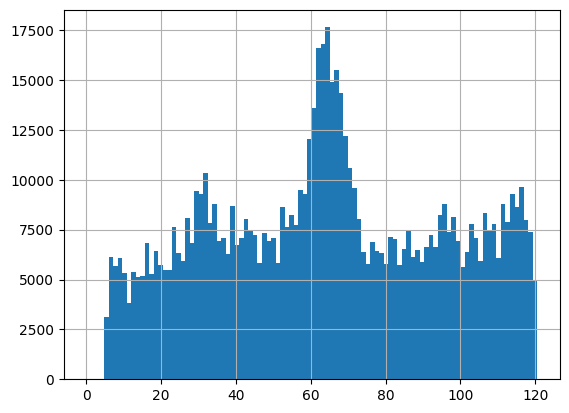

In [25]:
df_train["Length_Iter_Impute"].hist(bins=NUM_BINS)
plt.show()

# k-Nearest Neighbors Impute

In [26]:
knn_impute = imp.KNNImputer(missing_values=np.nan, n_neighbors=2)
df_knn_subset = df_train.sample( n=75000 )

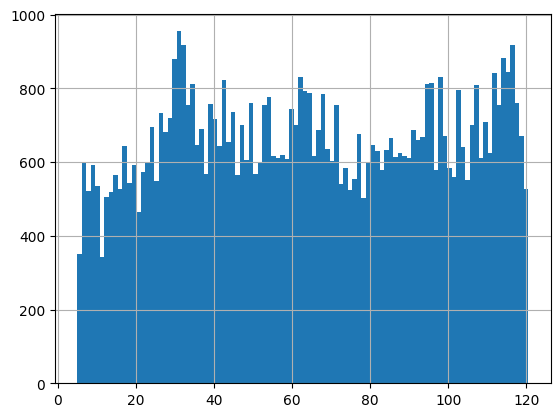

In [27]:
df_knn_subset["Length_Clean"].hist(bins=NUM_BINS)
plt.show()

In [29]:
impute_cols = ["Length_Clean", "Host_Popularity_percentage", "Num_Ads_Bin", 
               "Ads_Bin_Encoded", "Genre_Encoded", "Name_And_Episode_Encoded"]
#impute_cols = ["Length_Clean", "Ads_Bin_Encoded", "Genre_Encoded", "Name_And_Episode_Encoded"]
knn_impute.fit(df_knn_subset[impute_cols])
df_knn_subset["Length_Knn_Impute" ] = knn_impute.transform(df_knn_subset[impute_cols])[:,0]

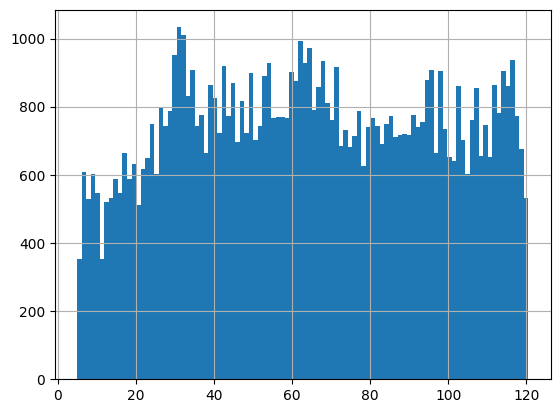

In [30]:
df_knn_subset["Length_Knn_Impute"].hist(bins=NUM_BINS)
plt.show()